# Supervised Sequence Classification

While unsupervised methods can be powerful to identify antigen-specific sequences, being able to leverage known labels to guide the learning process can provide for better results, provided there is a sufficient amount of data to learn from. The first type of supervised learning we will explore within DeepTCR is being able to correctly classify a given TCR sequence to some label (i.e. its antigen specificity) from using its sequence information.

First we will load data from the Murine dataset which has TCR sequences from 9 murine antigens with beta-chain information including sequence, v-beta, and j-beta gene usage.

In [1]:
import sys
sys.path.append('../../')
from DeepTCR.DeepTCR import DeepTCR_SS

# Instantiate training object
DTCR_SS = DeepTCR_SS('Tutorial')

#Load Data from directories
DTCR_SS.Get_Data(directory='../../Data/Murine_Antigens',Load_Prev_Data=False,aggregate_by_aa=True,
               aa_column_beta=0,count_column=1,v_beta_column=2,j_beta_column=3)

Loading Data...
Embedding Sequences...
Data Loaded


We will then train the sequence classifier as follows. First, we will split the dataset into a train,validation,and independent test cohort so we can assess how generalizable our model will be to new unseen data.And then we will train our sequene classifier. Our test_size parameter will tell DeepTCR how much of the data to leave out for valid/test which is split evenly across these two.

In [2]:
DTCR_SS.Get_Train_Valid_Test(test_size=0.25)
DTCR_SS.Train()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.conv2d instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Training_Statistics: 
 Epoch: 1/10000 Training loss: 2.14935 Validation loss: 2.04180 Testing loss: 2.04751 Training Accuracy: 0.17222 Validation Accuracy: 0.31475 Testing AUC: 0.49075
Training_Statistics: 
 Epoch: 2/10000 Training loss: 2.02184 Validation loss: 1.93160 Testing loss: 1.94043 Training Accuracy: 0.33122 Validation Accuracy: 0.3541 Testing AUC: 0.51604
Training_Statistics: 
 Epoch: 3/10000 Training loss: 1.91387 Validation loss: 1.86423 Testing loss: 1.87689 Training Accuracy: 0.35898 Validation Accuracy: 0.3541 Testing AUC: 0.54253
Training

Training_Statistics: 
 Epoch: 36/10000 Training loss: 1.12664 Validation loss: 1.28859 Testing loss: 1.31715 Training Accuracy: 0.6197 Validation Accuracy: 0.55082 Testing AUC: 0.80882
Training_Statistics: 
 Epoch: 37/10000 Training loss: 1.10813 Validation loss: 1.28732 Testing loss: 1.31445 Training Accuracy: 0.62631 Validation Accuracy: 0.55738 Testing AUC: 0.81058
Training_Statistics: 
 Epoch: 38/10000 Training loss: 1.09788 Validation loss: 1.28827 Testing loss: 1.31310 Training Accuracy: 0.62773 Validation Accuracy: 0.55082 Testing AUC: 0.81276
Training_Statistics: 
 Epoch: 39/10000 Training loss: 1.07905 Validation loss: 1.28809 Testing loss: 1.31202 Training Accuracy: 0.63467 Validation Accuracy: 0.56393 Testing AUC: 0.81308
Training_Statistics: 
 Epoch: 40/10000 Training loss: 1.06558 Validation loss: 1.28685 Testing loss: 1.30999 Training Accuracy: 0.63563 Validation Accuracy: 0.56393 Testing AUC: 0.81358
Training_Statistics: 
 Epoch: 41/10000 Training loss: 1.05878 Validatio

When we are done training, we can assess how well our classifier performs on the independent test set via looking at the ROC curves.

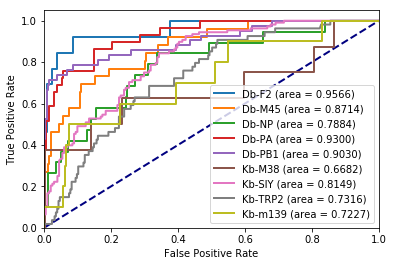

In [3]:
DTCR_SS.AUC_Curve()

We can also train our classifier with two other methods that allow for multiple iterations including a Monte Carlo method and K-Fold Cross-Validation Method.

For the Monte-Carlo method, we will specify the number of times we want to train train the classifier and the test size we want for each iteration. Of note, all parameters available for the Train method are also inputs for the Monte-Carlo and K-Fold Cross-Validation method.

In [4]:
DTCR_SS.Monte_Carlo_CrossVal(test_size=0.25,folds=5)

0
Training_Statistics: 
 Epoch: 1/10000 Training loss: 2.23869 Validation loss: 2.14359 Testing loss: 2.14530 Training Accuracy: 0.075667 Validation Accuracy: 0.14426 Testing AUC: 0.55712
Training_Statistics: 
 Epoch: 2/10000 Training loss: 2.11307 Validation loss: 2.02361 Testing loss: 2.02918 Training Accuracy: 0.19297 Validation Accuracy: 0.32131 Testing AUC: 0.58241
Training_Statistics: 
 Epoch: 3/10000 Training loss: 1.99405 Validation loss: 1.91353 Testing loss: 1.92461 Training Accuracy: 0.34536 Validation Accuracy: 0.3541 Testing AUC: 0.60292
Training_Statistics: 
 Epoch: 4/10000 Training loss: 1.88590 Validation loss: 1.85365 Testing loss: 1.87132 Training Accuracy: 0.35451 Validation Accuracy: 0.3541 Testing AUC: 0.62593
Training_Statistics: 
 Epoch: 5/10000 Training loss: 1.84984 Validation loss: 1.85981 Testing loss: 1.88321 Training Accuracy: 0.35483 Validation Accuracy: 0.3541 Testing AUC: 0.6488
Training_Statistics: 
 Epoch: 6/10000 Training loss: 1.85626 Validation loss

Training_Statistics: 
 Epoch: 50/10000 Training loss: 0.96084 Validation loss: 1.28808 Testing loss: 1.34785 Training Accuracy: 0.68904 Validation Accuracy: 0.59344 Testing AUC: 0.84246
Training_Statistics: 
 Epoch: 51/10000 Training loss: 0.94831 Validation loss: 1.29102 Testing loss: 1.33841 Training Accuracy: 0.69808 Validation Accuracy: 0.58361 Testing AUC: 0.84323
Training_Statistics: 
 Epoch: 52/10000 Training loss: 0.93574 Validation loss: 1.27933 Testing loss: 1.34483 Training Accuracy: 0.68865 Validation Accuracy: 0.59016 Testing AUC: 0.84308
Training_Statistics: 
 Epoch: 53/10000 Training loss: 0.92292 Validation loss: 1.27089 Testing loss: 1.34832 Training Accuracy: 0.7003 Validation Accuracy: 0.59016 Testing AUC: 0.84213
Training_Statistics: 
 Epoch: 54/10000 Training loss: 0.91289 Validation loss: 1.27665 Testing loss: 1.33702 Training Accuracy: 0.70108 Validation Accuracy: 0.59016 Testing AUC: 0.84431
Training_Statistics: 
 Epoch: 55/10000 Training loss: 0.89249 Validatio

Training_Statistics: 
 Epoch: 29/10000 Training loss: 1.25486 Validation loss: 1.31707 Testing loss: 1.30249 Training Accuracy: 0.56969 Validation Accuracy: 0.5377 Testing AUC: 0.82501
Training_Statistics: 
 Epoch: 30/10000 Training loss: 1.23387 Validation loss: 1.30739 Testing loss: 1.28924 Training Accuracy: 0.57862 Validation Accuracy: 0.5377 Testing AUC: 0.83002
Training_Statistics: 
 Epoch: 31/10000 Training loss: 1.21745 Validation loss: 1.29798 Testing loss: 1.27904 Training Accuracy: 0.59055 Validation Accuracy: 0.5541 Testing AUC: 0.83359
Training_Statistics: 
 Epoch: 32/10000 Training loss: 1.20129 Validation loss: 1.29086 Testing loss: 1.27018 Training Accuracy: 0.59852 Validation Accuracy: 0.5541 Testing AUC: 0.83653
Training_Statistics: 
 Epoch: 33/10000 Training loss: 1.19276 Validation loss: 1.28530 Testing loss: 1.26159 Training Accuracy: 0.59743 Validation Accuracy: 0.56066 Testing AUC: 0.83883
Training_Statistics: 
 Epoch: 34/10000 Training loss: 1.16942 Validation l

Training_Statistics: 
 Epoch: 19/10000 Training loss: 1.45646 Validation loss: 1.48333 Testing loss: 1.55477 Training Accuracy: 0.51666 Validation Accuracy: 0.4918 Testing AUC: 0.80085
Training_Statistics: 
 Epoch: 20/10000 Training loss: 1.42044 Validation loss: 1.45906 Testing loss: 1.53324 Training Accuracy: 0.52135 Validation Accuracy: 0.48852 Testing AUC: 0.80406
Training_Statistics: 
 Epoch: 21/10000 Training loss: 1.39217 Validation loss: 1.43680 Testing loss: 1.51365 Training Accuracy: 0.52617 Validation Accuracy: 0.48197 Testing AUC: 0.80953
Training_Statistics: 
 Epoch: 22/10000 Training loss: 1.36266 Validation loss: 1.41719 Testing loss: 1.49650 Training Accuracy: 0.52403 Validation Accuracy: 0.48525 Testing AUC: 0.81302
Training_Statistics: 
 Epoch: 23/10000 Training loss: 1.34065 Validation loss: 1.39911 Testing loss: 1.48000 Training Accuracy: 0.51916 Validation Accuracy: 0.48525 Testing AUC: 0.81629
Training_Statistics: 
 Epoch: 24/10000 Training loss: 1.31196 Validatio

Training_Statistics: 
 Epoch: 7/10000 Training loss: 1.80509 Validation loss: 1.81547 Testing loss: 1.81633 Training Accuracy: 0.35468 Validation Accuracy: 0.36393 Testing AUC: 0.6472
Training_Statistics: 
 Epoch: 8/10000 Training loss: 1.77586 Validation loss: 1.78357 Testing loss: 1.78556 Training Accuracy: 0.37084 Validation Accuracy: 0.39016 Testing AUC: 0.66721
Training_Statistics: 
 Epoch: 9/10000 Training loss: 1.74833 Validation loss: 1.75605 Testing loss: 1.75900 Training Accuracy: 0.41124 Validation Accuracy: 0.41639 Testing AUC: 0.68638
Training_Statistics: 
 Epoch: 10/10000 Training loss: 1.71546 Validation loss: 1.73422 Testing loss: 1.73790 Training Accuracy: 0.43522 Validation Accuracy: 0.41639 Testing AUC: 0.70188
Training_Statistics: 
 Epoch: 11/10000 Training loss: 1.69602 Validation loss: 1.71477 Testing loss: 1.71887 Training Accuracy: 0.43985 Validation Accuracy: 0.42295 Testing AUC: 0.71452
Training_Statistics: 
 Epoch: 12/10000 Training loss: 1.67589 Validation l

Training_Statistics: 
 Epoch: 52/10000 Training loss: 0.92222 Validation loss: 1.30697 Testing loss: 1.30093 Training Accuracy: 0.70022 Validation Accuracy: 0.54754 Testing AUC: 0.83979
Training_Statistics: 
 Epoch: 53/10000 Training loss: 0.90609 Validation loss: 1.30868 Testing loss: 1.30211 Training Accuracy: 0.70441 Validation Accuracy: 0.5541 Testing AUC: 0.84121
Training_Statistics: 
 Epoch: 54/10000 Training loss: 0.89623 Validation loss: 1.31253 Testing loss: 1.30231 Training Accuracy: 0.71127 Validation Accuracy: 0.54754 Testing AUC: 0.84258
Training_Statistics: 
 Epoch: 55/10000 Training loss: 0.88530 Validation loss: 1.30788 Testing loss: 1.30247 Training Accuracy: 0.71355 Validation Accuracy: 0.5541 Testing AUC: 0.84237
Training_Statistics: 
 Epoch: 56/10000 Training loss: 0.87222 Validation loss: 1.31075 Testing loss: 1.30141 Training Accuracy: 0.71549 Validation Accuracy: 0.57377 Testing AUC: 0.84393
Training_Statistics: 
 Epoch: 57/10000 Training loss: 0.85883 Validation

Training_Statistics: 
 Epoch: 41/10000 Training loss: 1.05223 Validation loss: 1.29717 Testing loss: 1.31775 Training Accuracy: 0.64635 Validation Accuracy: 0.54098 Testing AUC: 0.82198
Training_Statistics: 
 Epoch: 42/10000 Training loss: 1.03803 Validation loss: 1.28895 Testing loss: 1.31542 Training Accuracy: 0.65 Validation Accuracy: 0.5541 Testing AUC: 0.8215
Training_Statistics: 
 Epoch: 43/10000 Training loss: 1.02688 Validation loss: 1.28580 Testing loss: 1.31510 Training Accuracy: 0.64935 Validation Accuracy: 0.56066 Testing AUC: 0.82143
Training_Statistics: 
 Epoch: 44/10000 Training loss: 1.01246 Validation loss: 1.28073 Testing loss: 1.31066 Training Accuracy: 0.65185 Validation Accuracy: 0.55738 Testing AUC: 0.82222
Training_Statistics: 
 Epoch: 45/10000 Training loss: 0.99731 Validation loss: 1.28044 Testing loss: 1.31273 Training Accuracy: 0.65903 Validation Accuracy: 0.54754 Testing AUC: 0.82285
Training_Statistics: 
 Epoch: 46/10000 Training loss: 0.98274 Validation lo

Once again, we can view the AUC curve.

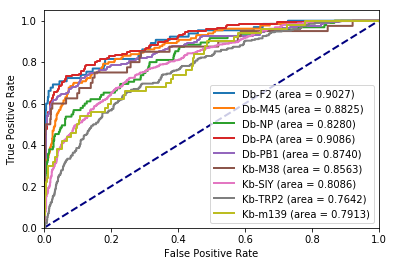

In [5]:
DTCR_SS.AUC_Curve()

To run a K-fold cross validation with 5 folds of the data, fun the following command. In this case, no test_size is required as the algorithm is trained on the entirety of the train folds and tested on the out-fold.

In [6]:
DTCR_SS.K_Fold_CrossVal(folds=5)

0
Training_Statistics: 
 Epoch: 1/10000 Training loss: 2.22618 Validation loss: 2.14686 Testing loss: 2.12456 Training Accuracy: 0.084235 Validation Accuracy: 0.22382 Testing AUC: 0.5445
Training_Statistics: 
 Epoch: 2/10000 Training loss: 2.10552 Validation loss: 2.04092 Testing loss: 2.01539 Training Accuracy: 0.27539 Validation Accuracy: 0.35729 Testing AUC: 0.57582
Training_Statistics: 
 Epoch: 3/10000 Training loss: 2.00582 Validation loss: 1.94476 Testing loss: 1.91391 Training Accuracy: 0.34353 Validation Accuracy: 0.3614 Testing AUC: 0.60558
Training_Statistics: 
 Epoch: 4/10000 Training loss: 1.92355 Validation loss: 1.86982 Testing loss: 1.83322 Training Accuracy: 0.33607 Validation Accuracy: 0.36345 Testing AUC: 0.63215
Training_Statistics: 
 Epoch: 5/10000 Training loss: 1.84171 Validation loss: 1.83556 Testing loss: 1.79342 Training Accuracy: 0.33773 Validation Accuracy: 0.36345 Testing AUC: 0.65404
Training_Statistics: 
 Epoch: 6/10000 Training loss: 1.80650 Validation lo

Training_Statistics: 
 Epoch: 46/10000 Training loss: 0.97983 Validation loss: 1.32790 Testing loss: 1.22320 Training Accuracy: 0.67385 Validation Accuracy: 0.54415 Testing AUC: 0.8435
Training_Statistics: 
 Epoch: 47/10000 Training loss: 0.97010 Validation loss: 1.32790 Testing loss: 1.22378 Training Accuracy: 0.67667 Validation Accuracy: 0.54825 Testing AUC: 0.84323
Training_Statistics: 
 Epoch: 48/10000 Training loss: 0.95585 Validation loss: 1.33244 Testing loss: 1.22504 Training Accuracy: 0.68439 Validation Accuracy: 0.5462 Testing AUC: 0.84373
Training_Statistics: 
 Epoch: 49/10000 Training loss: 0.95042 Validation loss: 1.34095 Testing loss: 1.22910 Training Accuracy: 0.68135 Validation Accuracy: 0.54415 Testing AUC: 0.84417
Done Training
Accuracy = 0.5934291581108829
1
Training_Statistics: 
 Epoch: 1/10000 Training loss: 2.12533 Validation loss: 2.03092 Testing loss: 2.03119 Training Accuracy: 0.28913 Validation Accuracy: 0.34702 Testing AUC: 0.51365
Training_Statistics: 
 Epoc

Training_Statistics: 
 Epoch: 43/10000 Training loss: 0.99952 Validation loss: 1.28348 Testing loss: 1.34334 Training Accuracy: 0.67625 Validation Accuracy: 0.56674 Testing AUC: 0.81973
Training_Statistics: 
 Epoch: 44/10000 Training loss: 0.99585 Validation loss: 1.28328 Testing loss: 1.35307 Training Accuracy: 0.68359 Validation Accuracy: 0.56468 Testing AUC: 0.81983
Training_Statistics: 
 Epoch: 45/10000 Training loss: 0.97755 Validation loss: 1.27637 Testing loss: 1.34539 Training Accuracy: 0.66863 Validation Accuracy: 0.56879 Testing AUC: 0.8222
Training_Statistics: 
 Epoch: 46/10000 Training loss: 0.94149 Validation loss: 1.28854 Testing loss: 1.33868 Training Accuracy: 0.68789 Validation Accuracy: 0.57084 Testing AUC: 0.82337
Training_Statistics: 
 Epoch: 47/10000 Training loss: 0.96971 Validation loss: 1.28232 Testing loss: 1.34030 Training Accuracy: 0.67971 Validation Accuracy: 0.57084 Testing AUC: 0.82345
Training_Statistics: 
 Epoch: 48/10000 Training loss: 0.93795 Validatio

Training_Statistics: 
 Epoch: 43/10000 Training loss: 1.04309 Validation loss: 1.24709 Testing loss: 1.35854 Training Accuracy: 0.65181 Validation Accuracy: 0.56263 Testing AUC: 0.83093
Training_Statistics: 
 Epoch: 44/10000 Training loss: 1.03502 Validation loss: 1.23866 Testing loss: 1.34769 Training Accuracy: 0.66145 Validation Accuracy: 0.57495 Testing AUC: 0.83399
Training_Statistics: 
 Epoch: 45/10000 Training loss: 1.01343 Validation loss: 1.23409 Testing loss: 1.34195 Training Accuracy: 0.66635 Validation Accuracy: 0.577 Testing AUC: 0.83451
Training_Statistics: 
 Epoch: 46/10000 Training loss: 0.98705 Validation loss: 1.23843 Testing loss: 1.35078 Training Accuracy: 0.67721 Validation Accuracy: 0.56057 Testing AUC: 0.83404
Training_Statistics: 
 Epoch: 47/10000 Training loss: 0.99712 Validation loss: 1.22475 Testing loss: 1.33973 Training Accuracy: 0.67203 Validation Accuracy: 0.57495 Testing AUC: 0.83696
Training_Statistics: 
 Epoch: 48/10000 Training loss: 0.97269 Validation

Training_Statistics: 
 Epoch: 31/10000 Training loss: 1.20975 Validation loss: 1.31201 Testing loss: 1.37247 Training Accuracy: 0.58148 Validation Accuracy: 0.55441 Testing AUC: 0.83285
Training_Statistics: 
 Epoch: 32/10000 Training loss: 1.18826 Validation loss: 1.30288 Testing loss: 1.36583 Training Accuracy: 0.59594 Validation Accuracy: 0.55441 Testing AUC: 0.83406
Training_Statistics: 
 Epoch: 33/10000 Training loss: 1.20314 Validation loss: 1.29635 Testing loss: 1.35198 Training Accuracy: 0.58852 Validation Accuracy: 0.55852 Testing AUC: 0.8364
Training_Statistics: 
 Epoch: 34/10000 Training loss: 1.15553 Validation loss: 1.29381 Testing loss: 1.34004 Training Accuracy: 0.60202 Validation Accuracy: 0.56263 Testing AUC: 0.83777
Training_Statistics: 
 Epoch: 35/10000 Training loss: 1.14763 Validation loss: 1.29187 Testing loss: 1.34047 Training Accuracy: 0.6072 Validation Accuracy: 0.56263 Testing AUC: 0.83749
Training_Statistics: 
 Epoch: 36/10000 Training loss: 1.13146 Validation

Training_Statistics: 
 Epoch: 25/10000 Training loss: 1.32053 Validation loss: 1.38487 Testing loss: 1.35652 Training Accuracy: 0.54514 Validation Accuracy: 0.51129 Testing AUC: 0.81619
Training_Statistics: 
 Epoch: 26/10000 Training loss: 1.29444 Validation loss: 1.37209 Testing loss: 1.34252 Training Accuracy: 0.55132 Validation Accuracy: 0.52156 Testing AUC: 0.82
Training_Statistics: 
 Epoch: 27/10000 Training loss: 1.27633 Validation loss: 1.36292 Testing loss: 1.32985 Training Accuracy: 0.5594 Validation Accuracy: 0.5154 Testing AUC: 0.82319
Training_Statistics: 
 Epoch: 28/10000 Training loss: 1.23094 Validation loss: 1.35256 Testing loss: 1.31829 Training Accuracy: 0.57743 Validation Accuracy: 0.51951 Testing AUC: 0.82539
Training_Statistics: 
 Epoch: 29/10000 Training loss: 1.22135 Validation loss: 1.34201 Testing loss: 1.30710 Training Accuracy: 0.58443 Validation Accuracy: 0.53183 Testing AUC: 0.82686
Training_Statistics: 
 Epoch: 30/10000 Training loss: 1.20938 Validation lo

Once our algorithm has been trained, we may want to see which sequences are the most strongly predicted for each label. To do this we will run the following command. The output of the command is a dictionary of dataframes within the object we can view. Additionally, these dataframes can be found in the results folder underneath the subdirectory 'Rep_Sequences'.

In [7]:
DTCR_SS.Representative_Sequences()

In [8]:
print(DTCR_SS.Rep_Seq['Db-F2'])

    alpha            beta      v_beta d_beta      j_beta v_alpha j_alpha  \
100  None   CASSIGDNYEQYF  TCRBV19-01   None  TCRBJ02-07    None    None   
1    None   CASSIGDYAEQFF  TCRBV19-01   None  TCRBJ02-01    None    None   
83   None   CASSMGANTEVFF  TCRBV19-01   None  TCRBJ01-01    None    None   
28   None   CASSPGQNTEVFF  TCRBV19-03   None  TCRBJ01-01    None    None   
21   None  CASSPGQDYTEVFF  TCRBV19-03   None  TCRBJ01-01    None    None   
31   None   CASSPGTNTEVFF  TCRBV19-03   None  TCRBJ01-01    None    None   
70   None   CASSAGANTEVFF  TCRBV19-03   None  TCRBJ01-01    None    None   
56   None  CASSAGTGDTEVFF  TCRBV19-03   None  TCRBJ01-01    None    None   
14   None   CASSPGTDTEVFF  TCRBV19-03   None  TCRBJ01-01    None    None   
26   None   CASSPGANTEVFF  TCRBV19-03   None  TCRBJ01-01    None    None   

     Class     Sample      Freq  ...           HLA     Db-F2    Db-M45  \
100  Db-F2  Db-F2.tsv  0.008547  ...  [N, o, n, e]  0.818157  0.016909   
1    Db-F2  Db-

Furthermore, we may want to know which learned motifs are associated with a given label. To do this, we can run the following command with the label we want to know the predictive motifs for.

In [9]:
DTCR_SS.Motif_Identification('Db-F2')

Motif Identification Completed


The motifs can then be found in fasta files in the results folder underneath (label)_(alpha/beta)_Motifs. These fasta fiels can then be used with "https://weblogo.berkeley.edu/logo.cgi" for motif visualization.

## Visualization

We can also visualize the learned latent space from the supervised sequence classifier through plotting a UMAP representation of the sequences in two dimensions.

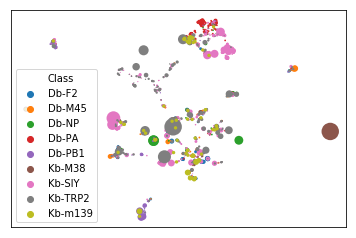

In [10]:
DTCR_SS.UMAP_Plot(by_class=True,freq_weight=True,scale=1000)

We can also specify whether we only want to plot sequences that were used in either train,valid, or the test set with the 'set' parameter.

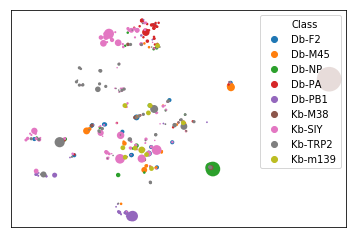

In [11]:
DTCR_SS.UMAP_Plot(by_class=True,freq_weight=True,scale=2000,set='test')

We can also visualize how the repertoires are related from this learned representation. This visualiztion is helpful when we want to compare how different TCR repertoires are related structurally.

UMAP transformation...
PhenoGraph Clustering...
Finding 30 nearest neighbors using minkowski metric and 'auto' algorithm
Neighbors computed in 3.1662213802337646 seconds
Jaccard graph constructed in 1.3120200634002686 seconds
Wrote graph to binary file in 0.268965482711792 seconds
Running Louvain modularity optimization
After 1 runs, maximum modularity is Q = 0.907838
Louvain completed 21 runs in 3.955014705657959 seconds
PhenoGraph complete in 8.71510124206543 seconds
Clustering Done


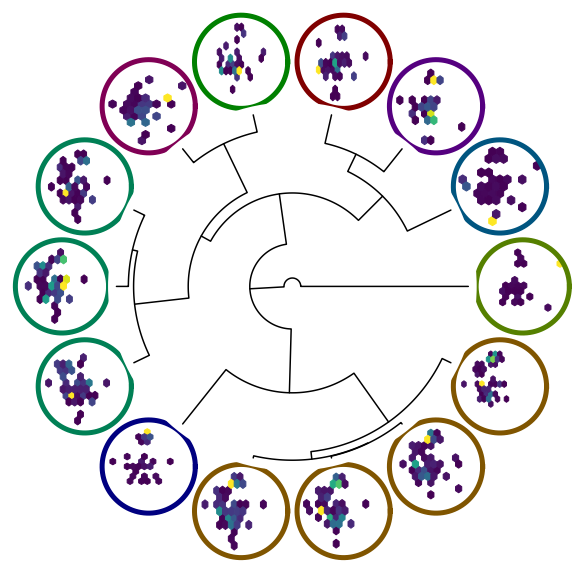

In [12]:
DTCR_SS.Repertoire_Dendrogram()

See documentation for how to use the full functionality of this method.